# <b>CS156 (Introduction to AI), Fall 2022</b>
# <u><b>Homework 10 submission</b></u>

### Roster Name: Preet LNU
### Student ID: 014755741
### Email address: preet.lnu@sjsu.edu

##  <u>References and sources </u>

- GAN.MNIST.ipynb 

##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [11]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Conv2DTranspose
from numpy import expand_dims
from numpy import ones
from numpy import zeros
from numpy.random import rand
from numpy.random import randint
from numpy.random import randn
from numpy import vstack
from numpy import asarray

In [12]:
np.random.seed(42)

#### Code the solution

In [13]:
input_shape = (28, 28, 1)

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

mnist = np.concatenate([x_train, x_test], axis=0)
mnist = expand_dims(mnist, axis=-1)

mnist = mnist.astype("float32") / 255

mnist.shape

(70000, 28, 28, 1)

In [14]:
def define_discriminator(in_shape=(28,28,1)):
    model = Sequential()
    model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same', input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    
    model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    
    model.add(Conv2D(64, (5,5), strides=(1, 1), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model


discriminator = define_discriminator()
discriminator.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        640       
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 7, 7, 64)          0         
                                                                 
 dropout_4 (Dropout)         (None, 7, 7, 64)          0         
                                                                 
 conv2d_6 (Conv2D)           (None, 7, 7, 64)         

In [15]:
def define_generator(latent_dim):
    model = Sequential()
   
    n_nodes = 128 * 7 * 7
    model.add(Dense(n_nodes, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((7, 7, 128)))
    
   
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    
    model.add(Conv2DTranspose(128, (1,1), strides=(1,1), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(1, (7,7), activation='sigmoid', padding='same'))
    return model
 
latent_dim = 100

generator = define_generator(latent_dim)
generator.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6272)              633472    
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 6272)              0         
                                                                 
 reshape_1 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 14, 14, 128)      262272    
 ranspose)                                                       
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                                 
 conv2d_transpose_4 (Conv2DT  (None, 14, 14, 128)      16512     
 ranspose)                                            

In [16]:
def define_gan(g_model, d_model):

    d_model.trainable = False

    model = Sequential()

    model.add(g_model)

    model.add(d_model)
   
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt)
    return model

gan_model = define_gan(generator, discriminator)
gan_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 28, 28, 1)         1180801   
                                                                 
 sequential_3 (Sequential)   (None, 1)                 143169    
                                                                 
Total params: 1,323,970
Trainable params: 1,180,801
Non-trainable params: 143,169
_________________________________________________________________


1/1 [==============================] - 0s 274ms/step


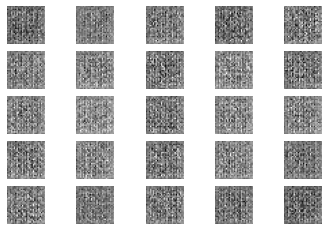

In [17]:
def generate_latent_points(latent_dim, n_samples):
    x_input = randn(latent_dim * n_samples)
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input

def generate_fake_generator_samples(g_model, latent_dim, n_samples):
    x_input = generate_latent_points(latent_dim, n_samples)
    X = g_model.predict(x_input)
    y = zeros((n_samples, 1))
    return X, y

n_samples = 25
X, _ = generate_fake_generator_samples(generator, latent_dim, n_samples)
for i in range(n_samples):
  
    plt.subplot(5, 5, 1 + i)
    
    plt.axis('off')
    
    plt.imshow(X[i, :, :, 0], cmap='gray_r')

plt.show()


In [18]:
def generate_real_samples(dataset, n_samples):

    ix = randint(0, dataset.shape[0], n_samples)

    X = dataset[ix]
    y = ones((n_samples, 1))
    return X, y
 
def generate_fake_samples(g_model, latent_dim, n_samples):
    x_input = generate_latent_points(latent_dim, n_samples)
    X = g_model.predict(x_input)
    y = zeros((n_samples, 1))
    return X, y

def generate_latent_points(latent_dim, n_samples):
    x_input = randn(latent_dim * n_samples)
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=100):

    X_real, y_real = generate_real_samples(dataset, n_samples)

    _, acc_real = d_model.evaluate(X_real, y_real, verbose=0)

    x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)

    _, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)

    print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
    
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=10, n_batch=256):
    bat_per_epo = int(dataset.shape[0] / n_batch)
    half_batch = int(n_batch / 2)
    
    for i in range(n_epochs):
        
        for j in range(bat_per_epo):
            
            X_real, y_real = generate_real_samples(dataset, half_batch)
            
            X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
            
            X, y = vstack((X_real, X_fake)), vstack((y_real, y_fake))
            
            d_loss, _ = d_model.train_on_batch(X, y)
            
            X_gan = generate_latent_points(latent_dim, n_batch)
           
            y_gan = ones((n_batch, 1))
            
            g_loss = gan_model.train_on_batch(X_gan, y_gan)
            
            print('>%d, %d/%d, d_loss=%.3f, g_loss=%.3f' % (i+1, j+1, bat_per_epo, d_loss, g_loss))
        
    summarize_performance(i, g_model, d_model, dataset, latent_dim)
            
    return g_model

In [9]:
latent_dim = 100

trained_generator = train(generator, discriminator, gan_model, mnist, latent_dim, 10)

Streaming output truncated to the last 5000 lines.
4/4 [==============================] - 1s 200ms/step
>1, 232/273, d_loss=0.700, g_loss=0.761
4/4 [==============================] - 1s 199ms/step
>1, 233/273, d_loss=0.691, g_loss=0.769
4/4 [==============================] - 1s 198ms/step
>1, 234/273, d_loss=0.696, g_loss=0.762
4/4 [==============================] - 1s 242ms/step
>1, 235/273, d_loss=0.702, g_loss=0.736
4/4 [==============================] - 1s 197ms/step
>1, 236/273, d_loss=0.690, g_loss=0.722
4/4 [==============================] - 1s 200ms/step
>1, 237/273, d_loss=0.689, g_loss=0.696
4/4 [==============================] - 1s 202ms/step
>1, 238/273, d_loss=0.697, g_loss=0.673
4/4 [==============================] - 1s 206ms/step
>1, 239/273, d_loss=0.687, g_loss=0.663
4/4 [==============================] - 1s 198ms/step
>1, 240/273, d_loss=0.678, g_loss=0.660
4/4 [==============================] - 1s 199ms/step
>1, 241/273, d_loss=0.676, g_loss=0.655
4/4 [==============

1/1 [==============================] - 0s 180ms/step


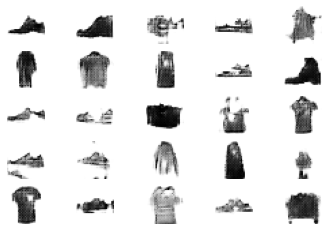

In [10]:
def generate_latent_points(latent_dim, n_samples):
    
    x_input = randn(latent_dim * n_samples)
    
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input
 
def display_plot(examples, n):
    for i in range(n * n):
        plt.subplot(n, n, 1 + i)
        plt.axis('off')
        plt.imshow(examples[i, :, :, 0], cmap='gray_r')
    plt.show()

latent_points = generate_latent_points(100, 25)

X = trained_generator.predict(latent_points)

display_plot(X, 5)